## Import Libraries

In [1]:
from nltk.corpus import stopwords
from nltk.tokenize.regexp import RegexpTokenizer
from gensim.models import Word2Vec
import os
import re
from pypdf import PdfReader
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


## UTIL: Function that processes a sentence to clean and tokenize it

In [3]:
def process_text(text):
    # Lowercase text
    text = text.lower()
    
    # Tokenize text
    tokenizer = RegexpTokenizer(r"[A-Za-z]{2,}")
    tokens = tokenizer.tokenize(text)
    
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens
            if token not in stop_words and token != '\n' and token != '' and token != ' ']
    
    return tokens

## VUE: Function to Clean and Combine Documentation Files

In [82]:
def combine_clean_files():
    # Define file path
    out_path = "data/vue_docs/output/"
    input_path = "data/vue_docs/originals"
    
    # Open output file
    with open(out_path + "all.txt", "w") as outfile:
        # iterate over files in input directory
        for filename in os.listdir(input_path):
            f = os.path.join(input_path, filename)
            # checking if it is a file
            if os.path.isfile(f):
                # Open file and clean text
                with open(f, "r") as infile:
                    sentences = infile.readlines()
                    
                     
                    # If the sentence is not empty, process it
                    for sentence in sentences:
                        if sentence:
                            # Remove URLs
                            sentence = re.sub(r"http\S+", "", sentence)
                            
                            tokens = process_text(sentence)
                            
                            # Write sentence tokens to output
                            outfile.write(" ".join(tokens) + "\n")

## VUE: Function to Read Output file and Create list

In [30]:
def file_to_list():
    with open('data/vue_docs/output/all.txt', 'r') as f:
        doc = f.readlines()
        
        sentences = []
        for sentence in doc:
            if sentence == '':
                continue
            tokens = sentence.split(' ')
            sentences.append(tokens)
            
        return sentences

In [32]:
# Combine and clean all Vue Docs files
# combine_clean_files()

# Read combined file into list of sentences
vue_sentences = file_to_list()

print(vue_sentences[:5])

[['script', 'setup\n'], ['import', 'onmounted', 'vue\n'], ['\n'], ['typeof', 'window', 'undefined\n'], ['const', 'hash', 'window', 'location', 'hash\n']]


## VUE: Train Word2Vec Model

In [33]:
# Train word2vec model
model = Word2Vec(sentences=vue_sentences, vector_size=16, window=2, sg=1)

for index, word in enumerate(model.wv.index_to_key):
    if index == 10:
        break
    print(f"word #{index}/{len(model.wv.index_to_key)}: {word}")
    
# Save to TSV
def vue_to_tsv():
    with open('data/vue_docs/vectors.tsv', 'w') as v:
        with open('data/vue_docs/metadata.tsv', 'w') as m:
            for word in model.wv.index_to_key:
                vector = model.wv.get_vector(word)
                vector_str = '\t'.join([str(num) for num in vector])
                v.write(f'{vector_str}\n')
                m.write(f'{word}\n')

# vue_to_tsv()

[ 0.3555263  -0.53978246 -0.2103601  -0.39131686  0.4282171   0.96680886
  0.0796593   0.1806623   0.24033767  0.2501878  -0.36130357 -0.3756651
  0.20925543 -0.17540748  0.0862464   0.5055385 ]
word #0/951: 

word #1/951: vue
word #2/951: component
word #3/951: class
word #4/951: components
word #5/951: html

word #6/951: vue

word #7/951: div
word #8/951: div

word #9/951: guide
[('fallback', 0.9970511794090271), ('import', 0.9969683289527893), ('expressions', 0.9959341287612915), ('perform', 0.9957133531570435), ('automatically', 0.9956355094909668), ('disabled', 0.9954448938369751), ('accessible', 0.9954315423965454), ('defineprops', 0.9953044056892395), ('loading', 0.9952998757362366), ('whether', 0.9951825737953186)]


## Read PDF File, Extract Text, Clean and Tokenize

In [19]:
# Create PDF reader
reader = PdfReader('data/MasteringTypeScript.pdf')

print(len(reader.pages))

# Extract text into list of sentences
all_sentences = []

for page in reader.pages:
    # Extract text from page
    text = page.extract_text()
    
    # Split text into sentences
    sentences = text.split('\n')
    
    # Clean sentences
    cleaned_sentences = []
    for sentence in sentences:
        if sentence == '':
            continue
    
        # Process text (clean and tokenize)
        tokens = process_text(sentence)
        
        if tokens:
            cleaned_sentences.append(tokens)
            
    # Add sentences to all_sentences
    if cleaned_sentences:
        all_sentences.extend(cleaned_sentences)
    

543


In [21]:
print(all_sentences[200:2015])

[['super', 'keyword'], ['function', 'overloading'], ['protected', 'class', 'members'], ['abstract', 'classes'], ['javascript', 'closures'], ['using', 'interfaces', 'classes', 'inheritance', 'factory', 'design'], ['pattern'], ['business', 'requirements'], ['factory', 'design', 'pattern'], ['iperson', 'interface'], ['person', 'class'], ['specialist', 'classes'], ['factory', 'class'], ['using', 'factory', 'class'], ['summary'], ['chapter', 'decorators', 'generics', 'asynchronous', 'features'], ['decorators'], ['decorator', 'syntax'], ['multiple', 'decorators'], ['decorator', 'factories'], ['class', 'decorator', 'parameters'], ['property', 'decorators'], ['static', 'property', 'decorators'], ['method', 'decorators'], ['using', 'method', 'decorators'], ['parameter', 'decorators'], ['decorator', 'metadata'], ['using', 'decorator', 'metadata'], ['iv', 'generics'], ['generic', 'syntax'], ['instantiating', 'generic', 'classes'], ['using', 'type'], ['constraining', 'type'], ['generic', 'interfac

## Write PDF Tokenized Sentences to File

In [24]:
# Write sentences to file
with open('data/MasteringTypeScript_Sentences.json', 'w') as f:
    json.dump(all_sentences, f)

## Read Tokenized Sentences Files

In [3]:
# Read sentences from file
with open('data/MasteringTypeScript_Sentences.json', 'r') as f:
    sentences = json.load(f)
    
print(sentences[:15])

[['mastering', 'typescript'], ['second', 'edition'], ['build', 'enterprise', 'ready', 'industrial', 'strength', 'web', 'applications'], ['using', 'typescript', 'leading', 'javascript', 'frameworks'], ['nathan', 'rozentals'], ['birmingham', 'mumbai'], ['mastering', 'typescript'], ['second', 'edition'], ['copyright', 'packt', 'publishing'], ['rights', 'reserved', 'part', 'book', 'may', 'reproduced', 'stored', 'retrieval', 'system'], ['transmitted', 'form', 'means', 'without', 'prior', 'written', 'permission'], ['publisher', 'except', 'case', 'brief', 'quotations', 'embedded', 'critical', 'articles', 'reviews'], ['every', 'effort', 'made', 'preparation', 'book', 'ensure', 'accuracy'], ['information', 'presented', 'however', 'information', 'contained', 'book', 'sold', 'without'], ['warranty', 'either', 'express', 'implied', 'neither', 'author', 'packt', 'publishing']]


## Train word2vec model

In [4]:
# Train word2vec model
model = Word2Vec(sentences=sentences, vector_size=16, window=2, sg=1)

for index, word in enumerate(model.wv.index_to_key):
    if index == 5:
        break
    print(f"word #{index}/{len(model.wv.index_to_key)}: {word}")
    
# Save to TSV
def write_tsv():
    with open('data/TypeScriptVectors.tsv', 'w') as v:
        with open('data/TypeScriptMetadata.tsv', 'w') as m:
            for word in model.wv.index_to_key:
                vector = model.wv.get_vector(word)
                vector_str = '\t'.join([str(num) for num in vector])
                v.write(f'{vector_str}\n')
                m.write(f'{word}\n')
                
# write_tsv()

word #0/1974: function
word #1/1974: class
word #2/1974: typescript
word #3/1974: code
word #4/1974: file


## Most Similar to: "TypeScript"

In [5]:
model.wv.most_similar(positive='typescript', topn=10)

[('testing', 0.9497255086898804),
 ('integration', 0.9421676397323608),
 ('frameworks', 0.9416745901107788),
 ('unit', 0.9388331770896912),
 ('compiler', 0.9222075939178467),
 ('building', 0.919166624546051),
 ('write', 0.9180529117584229),
 ('javascript', 0.9016613364219666),
 ('tools', 0.9002490639686584),
 ('applications', 0.8983176946640015)]

## Most Similar to: "JavaScript"

In [7]:
model.wv.most_similar(positive='javascript', topn=10)

[('writing', 0.9667671918869019),
 ('existing', 0.946830689907074),
 ('introduces', 0.9403114318847656),
 ('popular', 0.938347578048706),
 ('language', 0.9315301775932312),
 ('shows', 0.92374587059021),
 ('extjs', 0.919978678226471),
 ('library', 0.9199737310409546),
 ('built', 0.9164360165596008),
 ('explore', 0.9162933230400085)]

## SNS Plot

In [8]:
two_col_model = Word2Vec(sentences=sentences, vector_size=2, window=2, sg=1)

embedding0 = pd.DataFrame(columns=['d0', 'd1'])
for token in two_col_model.wv.index_to_key:
    embedding0.loc[token] = two_col_model.wv.get_vector(token)
embedding0

,d0,d1
function,0.894466,1.283311
class,1.078587,0.936236
typescript,2.087839,-0.209286
code,1.427237,0.522385
file,0.733603,1.743046
...,...,...
overrides,-0.027926,0.120951
browsermodule,0.354312,0.470298
particularly,0.769953,0.593647
secondinstance,0.346795,0.446050


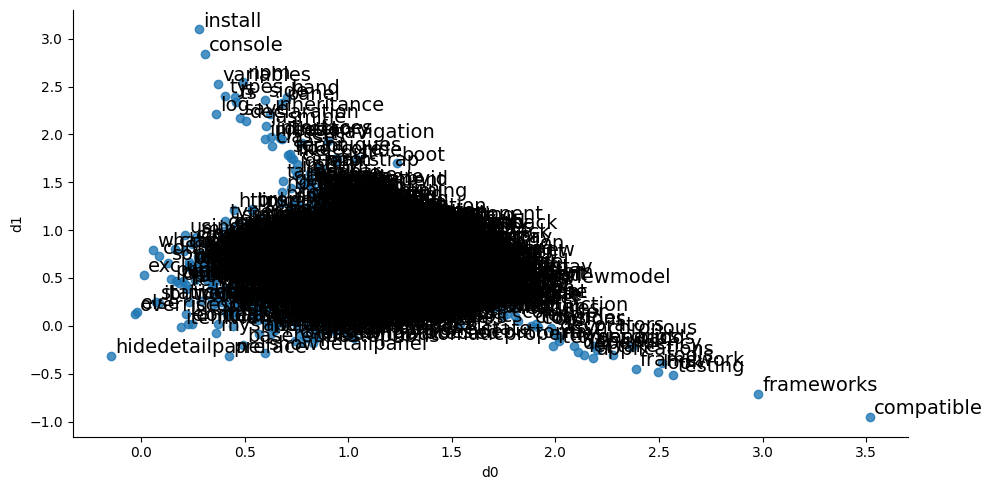

In [9]:
sns.lmplot(data=embedding0, x='d0', y='d1', fit_reg=False, aspect=2)

for token, vector in embedding0.iterrows():
    plt.gca().text(vector['d0']+.02, vector['d1']+.03, str(token), 
                   size=14)
plt.tight_layout()